https://stepik.org/lesson/1370094/step/7

$\lambda$

Qe = 0.41682772824345476
Q = 0.28928298969205285
w =  [-2.4371  0.1667  0.1959 -0.0246 -0.0035]
Q_numerical = 0.01941467878921161
w_numerical =  [-2.5063e+00  4.7780e-01  2.0540e-01 -4.7500e-02 -5.0000e-04]


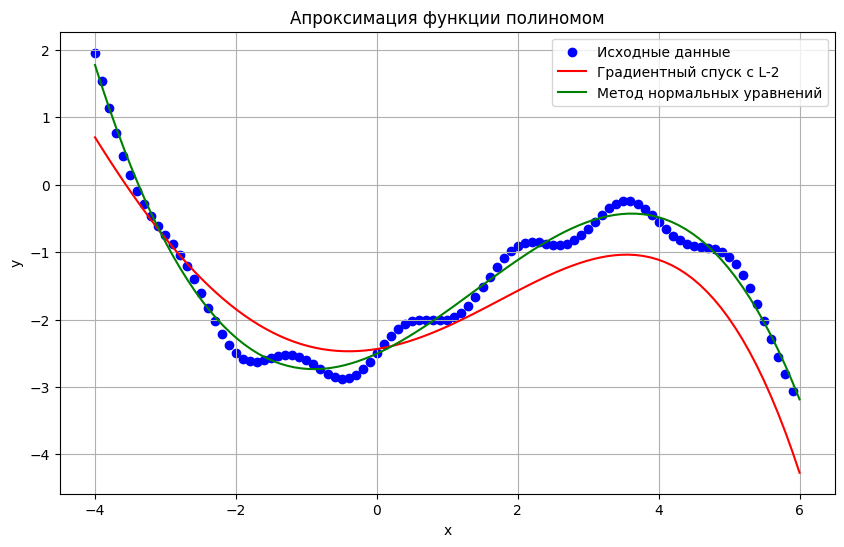

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import Matrix


# исходная функция, которую нужно аппроксимировать моделью a(x)
def func(x):
    return 0.5 * x + 0.2 * x ** 2 - 0.05 * x ** 3 + 0.2 * np.sin(4 * x) - 2.5

# модель
def model(w, x):
    xv = np.array([x ** n for n in range(len(w))])
    return w.T @ xv
# model = lambda w, x: x @ w

# функция потерь
def loss(w, x, y):
    return (model(w, x) - y) ** 2

# производная функции потерь
def dL(w, x, y):
    xv = np.array([x ** n for n in range(len(w))])
    return 2 * (model(w, x) - y) * xv


# Данные
coord_x = np.arange(-4.0, 6.0, 0.1) # значения по оси абсцисс [-4; 6] с шагом 0.1
coord_y = func(coord_x) # значения функции по оси ординат

# Параметры
N = 5               # сложность модели (полином степени N-1)
lm_l2 = 2           # коэффициент лямбда для L2-регуляризатора
sz = len(coord_x)	# количество значений функций (точек)
eta = np.array([0.1, 0.01, 0.001, 0.0001, 0.000002]) # шаг обучения для каждого параметра w0, w1, w2, w3, w4
w = np.zeros(N)     # начальные нулевые значения параметров модели
n_iter = 500        # число итераций алгоритма SGD
lm = 0.02           # значение параметра лямбда для скользящего экспоненциального среднего
batch_size = 20     # размер мини-батча (величина K = 20)
np.random.seed(0)   # генерация одинаковых последовательностей псевдослучайных чисел

Qe = loss(w, coord_x, coord_y).mean()   # начальное качество
Q_plot = [Qe]                           # для графика

for _ in range(n_iter):
    # Создаем мини-батч
    k = np.random.randint(0, sz - batch_size - 1)
    X_batch = coord_x[k:k + batch_size]
    y_batch = coord_y[k:k + batch_size]
    # Обновляем качество
    Qe += lm * (loss(w, X_batch, y_batch).mean() - Qe)
    Q_plot.append(Qe)               # для графика
    # Подсчёт вектора градиента по компонентам
    grad = np.array([dL(w, x, y) for x, y in zip(X_batch, y_batch)]).mean(axis=0)
    # Добавляем регуляризацию к весам, кроме w[0]
    grad[1:] += lm_l2 * w[1:]
    # Градиентный шаг
    w -= eta * grad                 # обновляем веса

Q = loss(w, coord_x, coord_y).mean() # итоговое качество

''' Аналитический метод из прошлой задачи (метод нормальных уравнений) для сравнения '''
# вычисление коэффициентов по формуле w = (XT*X + lambda*I)^-1 * XT * Y
X_v = np.array([[x ** n for n in range(N)] for x in coord_x])  # Матрица признаков
IL = lm_l2 * np.eye(N) # λ*I
IL[0][0] = 0        # первый коэффициент не регуляризуем
A = np.linalg.inv(X_v.T @ X_v + IL)
w_numerical = A @ X_v.T @ coord_y
Q_numerical = loss(w_numerical, coord_x, coord_y).mean()

# print('Qe =', Qe)
# print('Q =', Q)
# print('w = ', w.round(4))
# print('Q_numerical =', Q_numerical)
# print('w_numerical = ', w_numerical.round(4))

plt.figure(figsize=(10, 6))
plt.scatter(coord_x, coord_y, label='Исходные данные', color='blue')
x_plot = np.linspace(-4, 6, 100)
y_plot = model(w, x_plot)
y_num_plot = model(w_numerical, x_plot)
plt.plot(x_plot, y_plot, label='Градиентный спуск с L-2', color='red')
plt.plot(x_plot, y_num_plot, label='Метод нормальных уравнений', color='green')
plt.title('Апроксимация функции полиномом')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# @title Матрица признаков - быстрый способ
import numpy as np

# Функции
f = lambda x: .5 * x + .2 * x ** 2 - .05 * x ** 3 + .2 * np.sin(4 * x) - 2.5

# Шкала
coord_x = np.arange(-4.0, 6.0, 0.1) # значения по оси абсцисс [-4; 6] с шагом 0.1

# Параметры
N = 5               # сложность модели (полином степени N-1)
lm_l2 = 2           # коэффициент лямбда для L2-регуляризатора
sz = len(coord_x)	# количество значений функций (точек)
eta = np.array([0.1, 0.01, 0.001, 0.0001, 0.000002]) # шаг обучения для каждого параметра w0, w1, w2, w3, w4
w = np.zeros(N)     # начальные нулевые значения параметров модели
n_iter = 500        # число итераций алгоритма SGD
lm = 0.02           # значение параметра лямбда для скользящего экспоненциального среднего
batch_size = 20     # размер мини-батча (величина K = 20)
np.random.seed(0)   # генерация одинаковых последовательностей псевдослучайных чисел

# Матрица признаков и целевая переменная
X = np.array([[x ** n for n in range(N)] for x in coord_x])
Y = f(coord_x)
IL = lm_l2 * np.eye(N)  # матрица λ*I
IL[0][0] = 0            # первый коэффициент не регуляризуем

Qe = np.mean((X @ w - Y)**2) # начальное качество

# спуск с L2-регуляризацией
for _ in range(n_iter):
    k = np.random.randint(0, sz - batch_size - 1)
    t = k + batch_size
    Qe += lm * (((X[k:t] @ w - Y[k:t])**2).mean() - Qe)
    w -= eta * ((2 / batch_size) * np.sum((X[k:t] @ w - Y[k:t]) * X[k:t].T, axis=1) + IL @ w)

Q = np.mean((X @ w - Y)**2) # итоговое качество

print('Qe =', Qe)
print('Q =', Q)
print('w = ', w.round(4))

Qe = 0.4168277282434574
Q = 0.2892829896920535
w =  [-2.4371  0.1667  0.1959 -0.0246 -0.0035]


In [ ]:
import numpy as np

# исходная функция, которую нужно аппроксимировать моделью a(x)
def func(x):
    return 0.5 * x + 0.2 * x ** 2 - 0.05 * x ** 3 + 0.2 * np.sin(4 * x) - 2.5


# модель
def model(w, x):
    xv = np.array([x ** n for n in range(len(w))])
    return w.T @ xv


# функция потерь
def loss(w, x, y):
    return (model(w, x) - y) ** 2


# производная функции потерь
def dL(w, x, y):
    xv = np.array([x ** n for n in range(len(w))])
    return 2 * (model(w, x) - y) * xv


coord_x = np.arange(-4.0, 6.0, 0.1) # значения по оси абсцисс [-4; 6] с шагом 0.1
coord_y = func(coord_x) # значения функции по оси ординат

N = 5 # сложность модели (полином степени N-1)
lm_l2 = 2 # коэффициент лямбда для L2-регуляризатора
sz = len(coord_x)    # количество значений функций (точек)
eta = np.array([0.1, 0.01, 0.001, 0.0001, 0.000002]) # шаг обучения для каждого параметра w0, w1, w2, w3, w4
w = np.zeros(N) # начальные нулевые значения параметров модели
n_iter = 500 # число итераций алгоритма SGD
lm = 0.02 # значение параметра лямбда для вычисления скользящего экспоненциального среднего
batch_size = 20 # размер мини-батча (величина K = 20)

X = np.array([coord_x ** n for n in range(N)]).T
Qe = loss(w, coord_x, coord_y).mean() # начальное значение среднего эмпирического риска
np.random.seed(0) # генерация одинаковых последовательностей псевдослучайных чисел

# здесь продолжайте программу

for i in range(n_iter):
    k = np.random.randint(0, sz-batch_size-1)
    batch = range(k, k + batch_size)
    Q_k = loss(w, coord_x[batch], coord_y[batch]).mean()
    Qe = lm * Q_k + (1 - lm) * Qe
    grad = np.zeros(N)
    for j in batch:
        grad += dL(w, coord_x[j], coord_y[j])
    grad /= batch_size
    grad[1:] += lm_l2 * w[1:]
    for j in range(N):
        w[j] -= eta[j] * grad[j]


Q = loss(w, coord_x, coord_y).mean()

print('Qe =', Qe)
print('Q =', Q)
print('w = ', w.round(4))

Qe = 0.4168277282434544
Q = 0.28928298969205285
w =  [-2.4371  0.1667  0.1959 -0.0246 -0.0035]
